In [18]:
#step1: import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#step2:Load the Dataset
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
#step 3: cleaning Data
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [6]:
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
np.unique(df['ocean_proximity'])

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

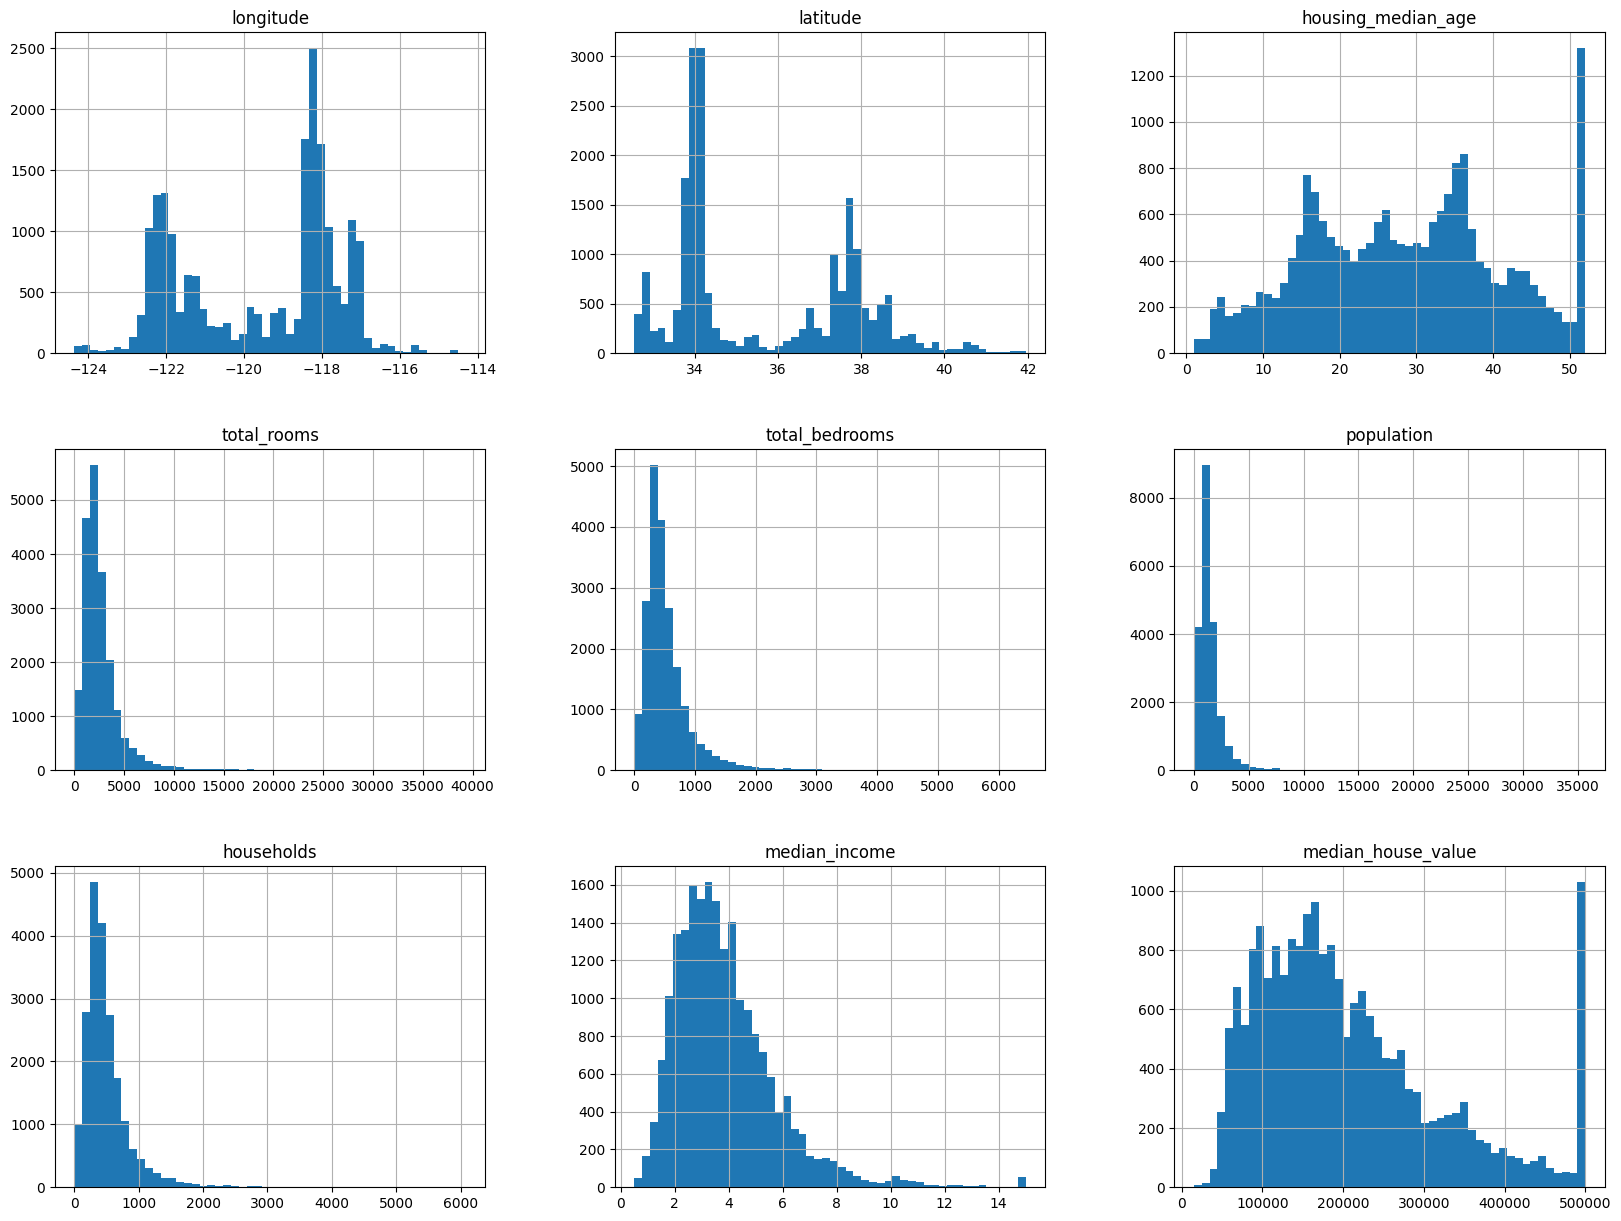

In [16]:
#Step-3: Data Visualization
df.hist(bins=50, figsize=(20,15))
plt.show()

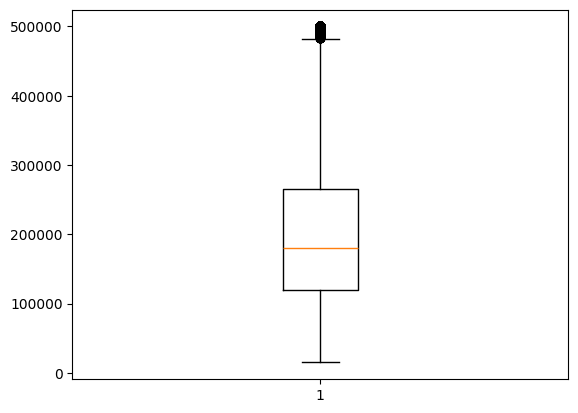

In [17]:
plt.boxplot(df['median_house_value'])
plt.show()

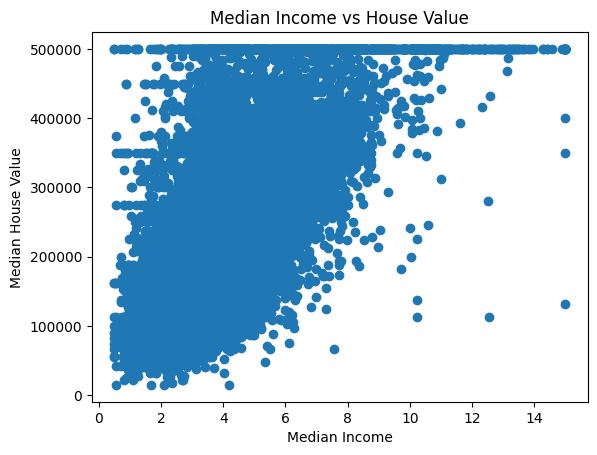

In [22]:
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs House Value")
plt.show()

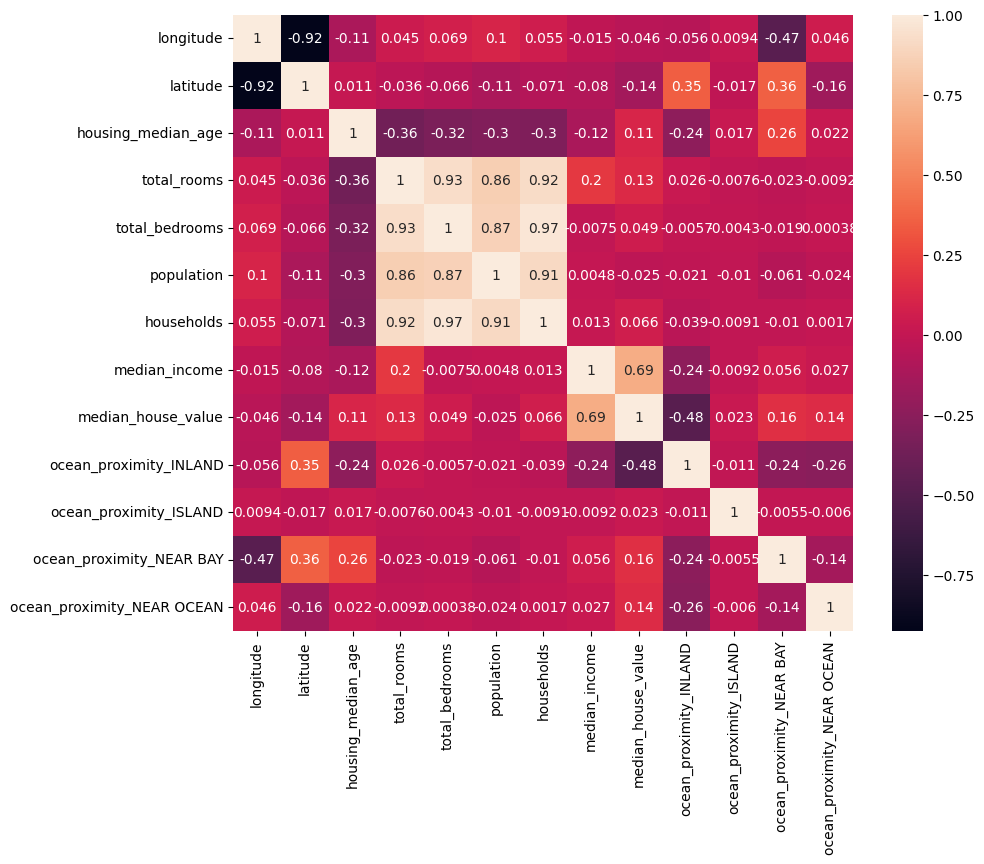

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [24]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20640, 12)
y shape: (20640,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 12), (4128, 12), (16512,), (4128,))

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.score(X_train, y_train)

0.6496648627123223

In [41]:
model.score(X_test, y_test)

0.6233392359648051

In [42]:
y_pred = model.predict(X_test)
print(y_pred)

[ 38123.09261337 108292.98265156 239557.02320603 ... 439180.9834118
 120797.55240621 183386.04993584]


In [43]:
m=model.coef_
m

array([-2.68382734e+04, -2.54683520e+04,  1.10218508e+03, -6.02150567e+00,
        1.02789395e+02, -3.81729064e+01,  4.82527528e+01,  3.94739752e+04,
       -3.97866562e+04,  1.36125073e+05, -5.13664222e+03,  3.43114007e+03])

In [44]:
b=model.intercept_
b

np.float64(-2275547.3817163985)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("Linear Regression RMSE:", rmse)
print("Linear Regression R2:", r2)

Linear Regression RMSE: 70255.22378747337
Linear Regression R2: 0.6233392359648051


#the score of the model is 62% so to improve the performance we can use Lasso, Ridge, ElasticNet Regression inorder to increase the performance.

In [48]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
model_lasso=Lasso(alpha=50,max_iter=5000,tol=0.1)
model_lasso.fit(X_train,y_train)

Lasso(alpha=50, max_iter=5000, tol=0.1)

In [49]:
model_lasso.score(X_test,y_test)

0.6225148514264249

#No increase in the performance lets perform Ridge Regression

In [50]:
model_ridge=Ridge(alpha=1.0, max_iter=100, tol=0.1)
model_ridge.fit(X_train,y_train)

Ridge(max_iter=100, tol=0.1)

In [51]:
model_ridge.score(X_test,y_test)

0.6232148235806224

#Now ElasticNet Regression


In [52]:
model_elas=ElasticNet(alpha=1.0, l1_ratio=0.5)
model_elas.fit(X_train,y_train)

ElasticNet()

In [53]:
model_elas.score(X_test,y_test)

0.6035905464121885

#ElasticNet Regression indeed reduced the performance. Lets perform Random Forest Model.

In [54]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [55]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [56]:
model_rf.score(X_test,y_test)

0.816190944940784